

# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've included a dataset of TMDB Movie list with relevant data such as revenu, budget, cast and so on. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

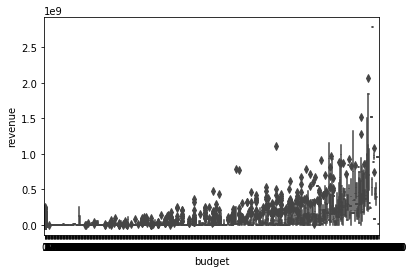

In [15]:
df = pd.read_csv("tmdb-movies.csv")
sns.boxplot(x='budget', y='revenue', data=df);

In [118]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [119]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [120]:
df.dropna(inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo


## Data Cleaning
Deleting some columns with non-quantative data or lots of missing values

In [122]:
df.drop(['imdb_id','original_title','homepage', 'overview', 'production_companies', 'tagline', 'keywords', 'cast'], axis=1, inplace=True)

In [123]:
df['gross_adj'] = df.revenue_adj - df.budget_adj

In [124]:
df.shape

(1992, 14)

In [125]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08,9.396531e+07
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08,2.253554e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07,5.961714e+06
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08,8.620654e+07
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
id              1992 non-null int64
popularity      1992 non-null float64
budget          1992 non-null int64
revenue         1992 non-null int64
director        1992 non-null object
runtime         1992 non-null int64
genres          1992 non-null object
release_date    1992 non-null object
vote_count      1992 non-null int64
vote_average    1992 non-null float64
release_year    1992 non-null int64
budget_adj      1992 non-null float64
revenue_adj     1992 non-null float64
gross_adj       1992 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 233.4+ KB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).



<a id='eda'></a>
## Exploratory Data Analysis


### Do more profitable movies receive higher votes? 

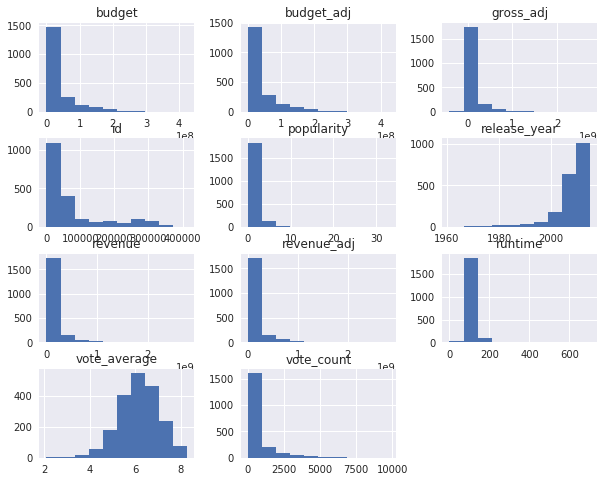

In [127]:
df.hist(figsize=(10,8));

In [128]:
#divide into two groups based on the mean of the gross_adj which is revenue - budget.

high_gross = df.gross_adj >= df.gross_adj.mean()
low_gross = df.gross_adj < df.gross_adj.mean()

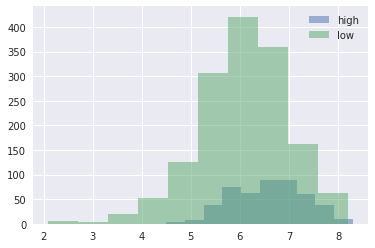

In [129]:
#create histogram to show the average vote of the each group. 

df.vote_average[high_gross].hist(alpha=0.5, label='high');
df.vote_average[low_gross].hist(alpha=0.5, label='low');
plt.legend();

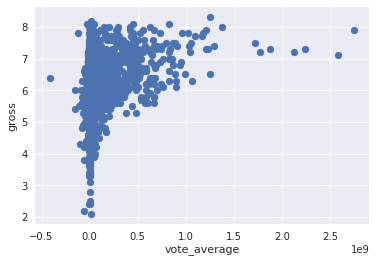

In [138]:
#observe correlation between the averegage vote and gross revenue
plt.scatter(df.gross_adj,df.vote_average);
plt.xlabel('vote_average');
plt.ylabel('gross');

### Correlation between the amount of investment (budget) and return (revenue)

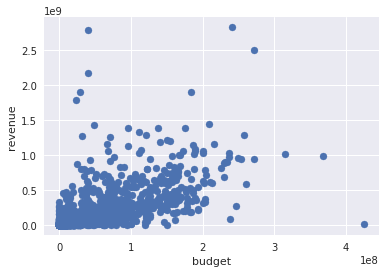

In [132]:
plt.scatter(df.budget_adj, df.revenue_adj);
plt.xlabel('budget');
plt.ylabel('revenue');

<a id='conclusions'></a>
## Conclusions
1. There's no strong correlation between the money made and the average rating of the movies. The vote averages are normally distributed for both high and low groups. But there's a large number of movies with zero profit that has various rating. 

2. Budget seems to have effect on revenue. A weak positive correlation is observed in the graph of budget and revenue. But there a fair amount of outliers. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])